In [4]:
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
# Set up the Titanic csv file as a DataFrame
df = pd.read_csv('train.csv')

# Let's see a preview of the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


**Questions to Answer:**

- Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)
- What deck were the passengers on and how does that relate to their class?
- Where did the passengers come from?
- Who was alone and who was with family?
- What factors helped someone survive the sinking?

**Who were the passengers?**

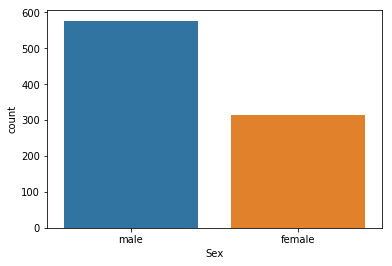

In [10]:
# What was the difference in gender?

sns.countplot('Sex',data=df)

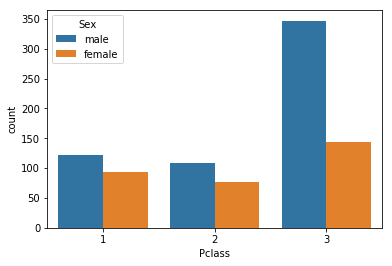

In [11]:
# What about genders by the ticket classes? More males than females in 3rd class.
sns.countplot('Pclass',data=df,hue='Sex')

In [12]:
# How many of those were children?

# First make a function to break these out
def male_female_child(passenger):
    age, sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex

# Then create a new feature called 'person' based on the function
df['person'] = df[['Age','Sex']].apply(male_female_child,axis=1)

In [13]:
df[0:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


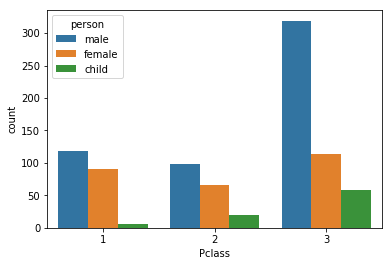

In [14]:
# retry the same countplot on 'person'
# many children in 3rd class, very few in first
sns.countplot('Pclass',data=df,hue='person')

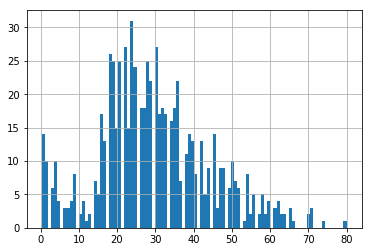

In [15]:
# Add age context - plot a histogram of ages
df['Age'].hist(bins=100)

In [22]:
# Add age counts:
df['Age'].value_counts().head()

24.0    30
22.0    27
18.0    26
19.0    25
30.0    25
Name: Age, dtype: int64

In [16]:
# What is the mean age?
df['Age'].mean()

29.69911764705882

In [21]:
# How many men, women and children on board?
df['person'].value_counts().head()

male      537
female    271
child      83
Name: person, dtype: int64

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


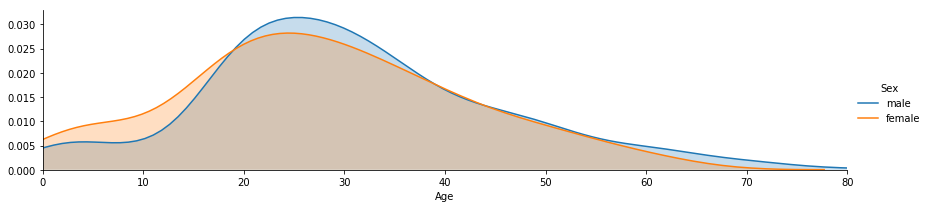

In [23]:
# Visualizing Age with FacetGrid and kdeplot using multiple subplots
fig = sns.FacetGrid(df, hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True) # add the kdeplot
oldest = df['Age'].max() # what should the upper limit of the x axis be?
fig.set(xlim=(0,oldest)) # set the xlimits from non-negative numbers to oldest
fig.add_legend() # add a legend

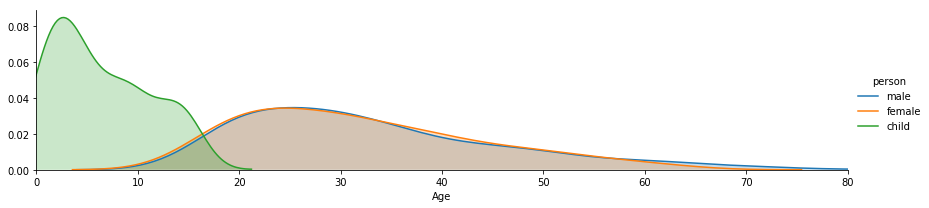

In [24]:
# Visualizing Children using the same method
fig = sns.FacetGrid(df, hue='person',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True) # add the kdeplot
oldest = df['Age'].max() # what should the upper limit of the x axis be?
fig.set(xlim=(0,oldest)) # set the xlimits from non-negative numbers to oldest
fig.add_legend() # add a legend

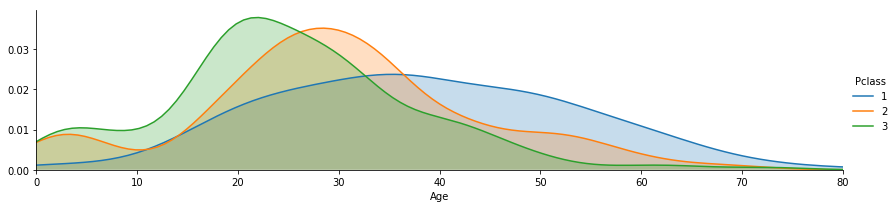

In [25]:
# View usingTicket Class
fig = sns.FacetGrid(df, hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True) # add the kdeplot
oldest = df['Age'].max() # what should the upper limit of the x axis be?
fig.set(xlim=(0,oldest)) # set the xlimits from non-negative numbers to oldest
fig.add_legend() # add a legend

**What deck and Class were they?**

In [28]:
# How do we see what decks people were on? There's a cabin row, but not all are filled out. 
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female


In [29]:
# Using a subset of the data that has Cabin information
deck = df['Cabin'].dropna().copy()

In [78]:
# How many passengers have cabin data?
len(deck)

204

In [30]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [31]:
# strip off the first letter
decks = []
# Use the first letter as the deck 
for d in deck:
    decks.append(d[0])

In [45]:
alldecks = list(set(decks))
alldecks

['T', 'F', 'A', 'D', 'G', 'C', 'E', 'B']

In [38]:
# create a dataframe of the decks with the Column Name 'Deck'
deck_df = pd.DataFrame(decks)
deck_df.columns = ['Deck']

In [39]:
deck_df.head()

,Deck
0,C
1,C
2,E
3,G
4,C


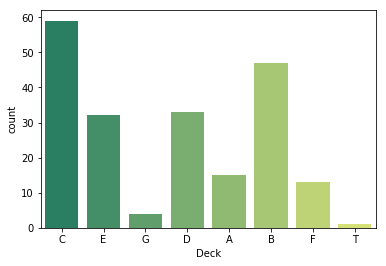

In [41]:
# Show the number of people per deck
sns.countplot('Deck',data=deck_df,palette='summer')

https://www.dummies.com/education/history/titanic-facts-the-layout-of-the-ship/

There's not an explanation for T - possibly Tank Top, which was for crew, but not passengers.

In [42]:
# Dropping Deck T 
deck_df = deck_df[deck_df['Deck'] != 'T']

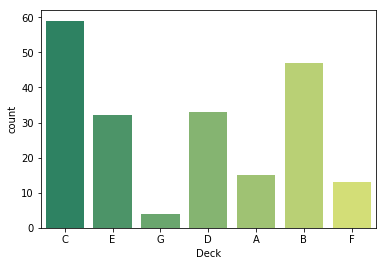

In [43]:
# Replot
sns.countplot('Deck',data=deck_df,palette='summer')

Now add this infomation to the main dataframe to examine Pclass/Deck 

In [76]:
def whatdeck(thedeck):
    decks = ['T', 'F', 'A', 'D', 'G', 'C', 'E', 'B']
    if 'nan' not in str(thedeck):
        if str(thedeck[0]) in decks:
            return str(thedeck[0])

In [80]:
# Then create a new feature called 'Deck' based on the function
df['Deck'] = df['Cabin'].apply(whatdeck)

In [81]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,None
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,None
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,None


In [84]:
df_classdeck = df[['Pclass','Deck']].dropna().copy()

In [86]:
df_classdeck.head()

,Pclass,Deck
1,1,C
3,1,C
6,1,E
10,3,G
11,1,C


From the limited sample, first class is A-E, but not F or G. Second  are scattered between D through F and 3rd class are scattered between E-G, with only 3rd class in G.

Also - T seems to be a deck for only First Class.

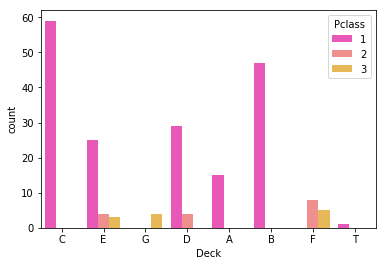

In [93]:
# Replot with Deck info
sns.countplot('Deck',data=df_classdeck,hue='Pclass',palette='spring')

**Where did the passengers come from?**

Embarked column has S,C and Q values. These stand for  Southhampton, Cherbourg, and Queenstown which is the order in which they boarded.

In [95]:
df['Embarked'].head(10)

0    S
1    C
2    S
3    S
4    S
5    Q
6    S
7    S
8    S
9    C
Name: Embarked, dtype: object

She was built in Dublin and shipped to SouthHampton, sailed to Cherbourg, then Queenstown before starting the transatlantic crossing

- in Southhampton, in the South of England most passengers boarded and most were 3rd class
- In Cherbourg first and third class passengers boarded about on par, but very few 2nd class
- In Queenstown (now Cobh, Ireland), south of , almost all passengers boarded were 3rd class 

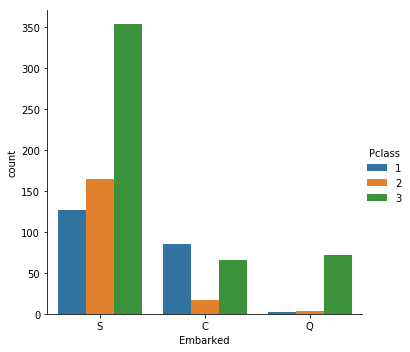

In [100]:
# Showing which Pclass originated from which port, in order of stops
sns.catplot('Embarked',data=df,kind='count',hue='Pclass',order=['S','C','Q'])

**Who was with family?**

In [102]:
# SibSp Number of Siblings/Spouses Aboard boolean
# Parch Number of Parents/Children Aboard boolean
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'person', 'Deck'],
      dtype='object')

if we add the booleans together, this should create a Boolean that shows if a passenger was alone (0) or not (nonzero)

In [108]:
df['Alone'] = df.Parch + df.SibSp

In [109]:
# How change the column name to something friendlier sounding
df['Alone'].loc[df['Alone'] > 0] = 'With Family'
df['Alone'].loc[df['Alone']== 0] = 'Alone'

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [110]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Deck,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,None,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,C,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,None,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,C,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,None,Alone


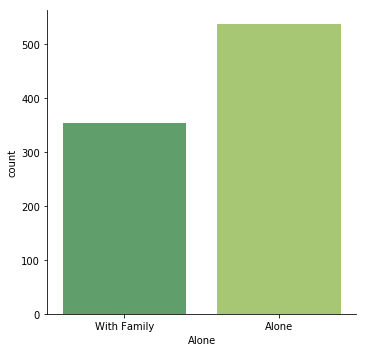

In [116]:
# visualize Alone vs With Family
sns.catplot('Alone',kind='count',data=df,palette='summer')

**What factors helped someone survive?**

In [118]:
# Survived is a boolean
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Deck,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,None,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,C,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,None,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,C,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,None,Alone


In [126]:
# Only 342 people survived out of 891
df["Survived"].sum(), df.PassengerId.count()

(342, 891)

In [127]:
#titanic_df["Survivor"] = titanic_df.Survived.map({0: "no", 1: "yes"})
# adding a new feature to answer Yes or No to a Passenger's surviving
didsurvive={0:"no",1:"yes"}
df['Survivor'] = df['Survived'].map(didsurvive)

In [128]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Deck,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,None,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,C,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,None,Alone,yes


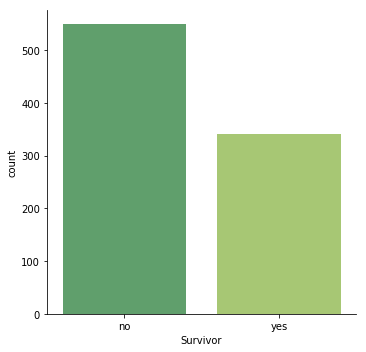

In [129]:
# plot survivors
sns.catplot('Survivor',data=df,kind='count',palette='summer')

So first class passengers had a better survival rate

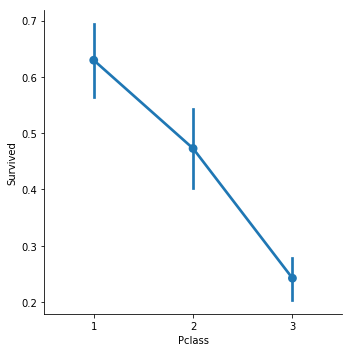

In [132]:
# Compare Survived with Pclass
sns.factorplot('Pclass','Survived',data=df)

Generally Men did worse than women or children. 
We can see that all in first class did better than 3rd class, though Second Class children did the best.

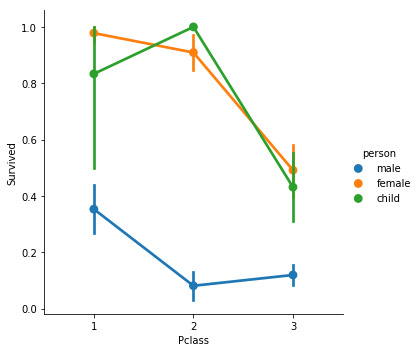

In [134]:
# Compare Gender and age outcomes
sns.factorplot('Pclass','Survived',hue='person',data=df)

Generally the oldest did the worst. 

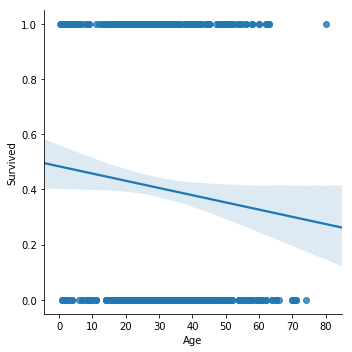

In [136]:
# Compare outcomes based on age
sns.lmplot('Age','Survived',data=df,palette='summer')

It would appear that the older did poorly across the passenger classes

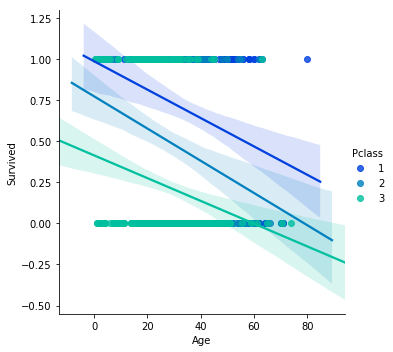

In [142]:
# add Pclass hue
sns.lmplot('Age','Survived',hue='Pclass',data=df,palette='winter')

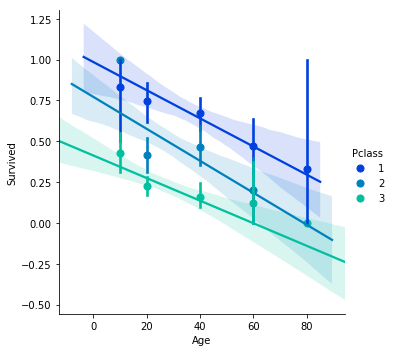

In [149]:
# Adding in x_bins to get a StdDev dimension
generations=[10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass',data=df,palette='winter', x_bins=generations)

It would appear that older women fared better than older men, but with a wide standard deviation for men

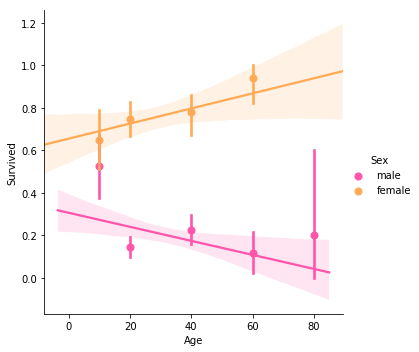

In [153]:
# add Sex hue
sns.lmplot('Age','Survived',hue='Sex',data=df,palette='spring',x_bins=generations)

Did the passenger's deck have an effect?

In [171]:
haddeck_df = df[['Survived','Deck']].dropna()

B, D and E decks were all associated with better outcomes, A, G and T were the worst, though G has a weirdly large standard deviation

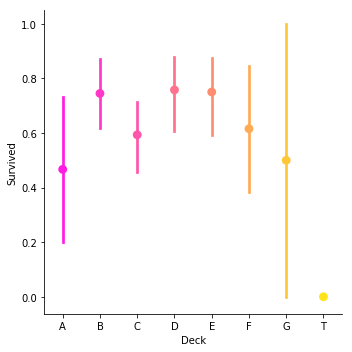

In [180]:
sns.factorplot('Deck','Survived',data=haddeck_df,palette='spring',order=['A','B','C','D','E','F','G','T'])

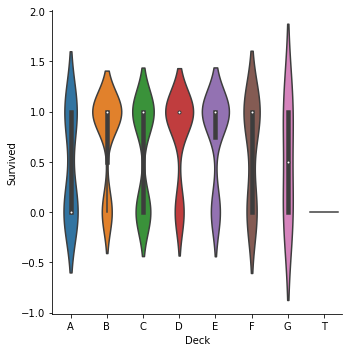

In [195]:
sns.catplot(x='Deck', y='Survived', 
            data=haddeck_df,
            kind='violin',order=['A','B','C','D','E','F','G','T'])

Did being with family have an effect?

It appears that those that were alone had worse outcomes

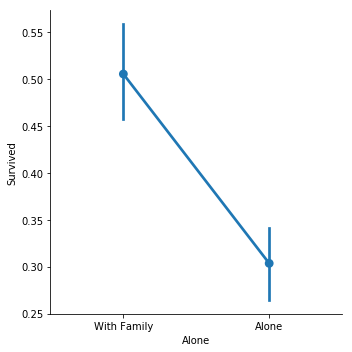

In [197]:
sns.catplot('Alone','Survived',data=df, kind='point')

In [205]:
# To make the lmplot we need a non-categorical value for 'Alone'
def isloner(val):
    "reduce large SibSp values to 1"
    if val > 0:
        return 1
    else:
        return 0

In [206]:
# create a new feature for a boolean 'Alone'
df['Loner'] = df.Parch + df.SibSp
df['Loner'] = df['Loner'].apply(isloner)

Outcomes were better for Children and Women with families, but there appears to be a slight uptick in survival for males

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


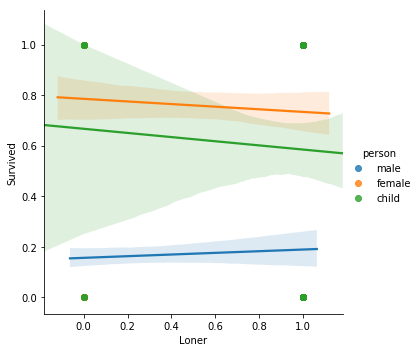

In [208]:
sns.lmplot('Loner','Survived',hue='person',data=df)